# Pandas output with scikit-learn's `set_output` API 

In [1]:
import sklearn

In [2]:
sklearn.__version__

'1.4.dev0'

## What is the `set_output` API?

In [3]:
import pandas as pd

In [4]:
X_df = pd.DataFrame({"age": [30, 40, 50],
                     "height": [120, 140, 160]})

In [5]:
X_df

,age,height
0,30,120
1,40,140
2,50,160


### Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_out_np = scaler.fit_transform(X_df)

In [8]:
X_out_np

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

In [9]:
scaler.set_output(transform="pandas") 

StandardScaler()

In [10]:
X_out_df = scaler.fit_transform(X_df)

In [11]:
X_out_df

,age,height
0,-1.224745,-1.224745
1,0.000000,0.000000
2,1.224745,1.224745


## What about a Pipeline?

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [13]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
pipe.set_output(transform="pandas")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures())])

In [14]:
X_trans = pipe.fit_transform(X_df)

In [15]:
X_trans

,1,age,height,age^2,age height,height^2
0,1.0,-1.224745,-1.224745,1.5,1.5,1.5
1,1.0,0.000000,0.000000,0.0,0.0,0.0
2,1.0,1.224745,1.224745,1.5,1.5,1.5


## Heterogenous Data

In [16]:
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [17]:
titanic = fetch_openml("titanic", version=1, as_frame=True, parser="pandas")

/Users/thomasfan/Repos/scikit-learn-1/sklearn/datasets/_openml.py:102: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/titanic/limit/2/data_version/1. Retrying...
  warn(


URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [ ]:
X, y = titanic.data, titanic.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
X_train.head()

### Numerical Preprocessing

In [20]:
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

### Categorical Preprocessing

In [21]:
categorical_features = ["embarked", "sex", "pclass"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

### Combine them!

In [22]:
preprocessor = ColumnTransformer([
    ("numerical", numeric_transformer, numeric_features),
    ("categorical", categorical_transformer, categorical_features),
])

In [23]:
preprocessor.fit_transform(X_train)

array([[-0.12119507, -0.4912911 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.88218736,  0.00268658,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.1972943 , -0.48028791,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.12119507, -0.49166989,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.34949276, -0.49174637,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71589644, -0.38657693,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

### `set_output`!

In [24]:
preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fare']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['embarked', 'sex', 'pclass'])])

In [25]:
X_train_out = preprocessor.fit_transform(X_train)

### Verbose names

In [26]:
X_train_out

,numerical__age,numerical__fare,categorical__embarked_C,categorical__embarked_Q,categorical__embarked_S,categorical__sex_female,categorical__sex_male,categorical__pclass_1,categorical__pclass_2,categorical__pclass_3
813,-0.121195,-0.491291,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
809,-0.882187,0.002687,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
906,-0.197294,-0.480288,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
305,2.313980,-0.139816,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
988,-0.121195,-0.482186,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
135,3.151072,0.007771,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1275,-1.034386,-0.295521,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1037,-0.121195,-0.491670,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1165,-0.349493,-0.491746,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
preprocessor.set_params(verbose_feature_names_out=False)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fare']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['embarked', 'sex', 'pclass'])],
                  verbose_feature_names_out=False)

In [28]:
preprocessor.fit_transform(X_train)

,age,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
813,-0.121195,-0.491291,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
809,-0.882187,0.002687,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
906,-0.197294,-0.480288,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
305,2.313980,-0.139816,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
988,-0.121195,-0.482186,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
135,3.151072,0.007771,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1275,-1.034386,-0.295521,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1037,-0.121195,-0.491670,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1165,-0.349493,-0.491746,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Predictive Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

In [31]:
log_reg.set_output(transform="pandas")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['embarked', 'sex',
                                                   'pclass'])],
                                   verbose_feature_names_out=False)),
                ('classifier', LogisticRegression())])

In [32]:
_ = log_reg.fit(X_train, y_train)

## Feature names!

In [33]:
classifier = log_reg[-1]
classifier

LogisticRegression()

In [34]:
classifier.feature_names_in_

array(['age', 'fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype=object)

In [35]:
classifier.coef_[0]

array([-0.41816652, -0.00375339,  0.36668759, -0.17076447, -0.1959462 ,
        1.16845509, -1.16847817,  0.99596501,  0.00652106, -1.00250915])

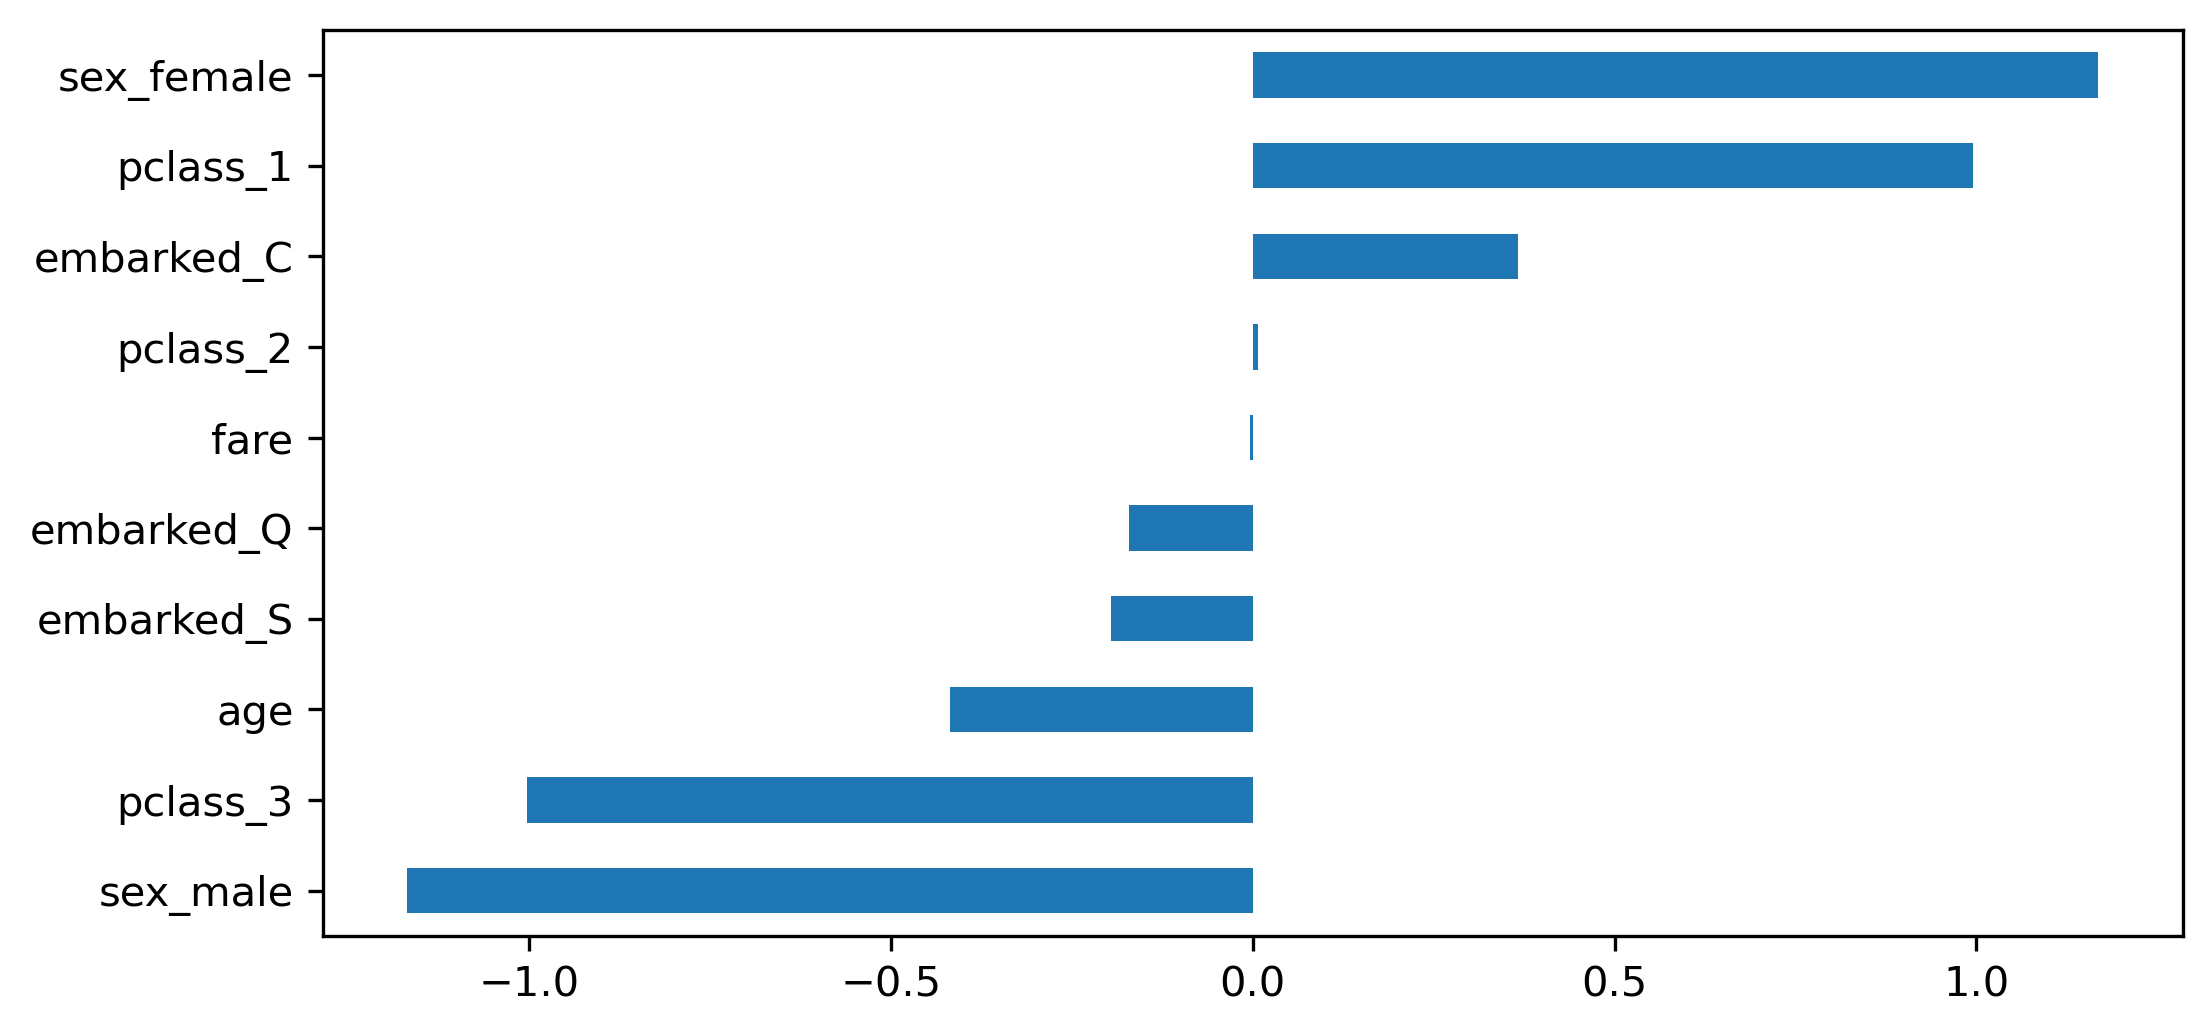

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
_ = pd.Series(classifier.coef_[0], index=classifier.feature_names_in_).sort_values().plot.barh(ax=ax)

## Try it out!

This notebook is avaliable on GitHub:

```bash
git clone https://github.com/thomasjpfan/sklearn-set_output-material
```